In [28]:
import torch
import matplotlib.pyplot as plt
import torchvision
from torch.utils import data
import torch.nn as nn

In [23]:
### Intializing hyperparameters ###
EPOCH = 100
BATCH_SIZE = 10
LR = 0.001
DOWNLOAD = True

In [35]:
mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=DOWNLOAD, transform=torchvision.transforms.ToTensor())
mnist_testset = torchvision.datasets.MNIST(root='./data', train=False, download=DOWNLOAD, transform=None)

/Users/Joann/miniconda3/envs/deep/lib/python3.8/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


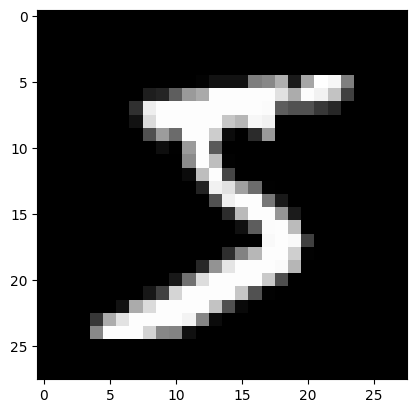

In [31]:
plt.imshow(mnist_trainset.train_data[0].numpy(), cmap = 'gray')

In [37]:
## Normalize data to 0~1
test_x = torch.unsqueeze(mnist_testset.data, dim = 1).type(torch.FloatTensor)[:2000]/255.
test_y = mnist_testset.targets[:2000]

In [38]:
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=BATCH_SIZE, shuffle=False)

In [39]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2),  # stride=1, padding=(kernel_size-1)/2
        nn.ReLU(),  # (16, 28, 28)
        nn.MaxPool2d(2),# (16, 14, 14)
    )
    self.conv2 = nn.Sequential(  # (16, 14, 14)
        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2),  # (32, 14, 14)
        nn.ReLU(),  # (32,14,14)
        nn.MaxPool2d(2)  # (32, 7, 7)
    )
    self.out = nn.Linear(in_features=32*7*7, out_features=10)  # 10 classes

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = x.view(x.size(0), -1)
    output = self.out(x)
    return output, x

In [40]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [41]:
optimization = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

In [46]:
for epoch in range(EPOCH):
  for step, (batch_x, batch_y) in enumerate(train_loader):
    output = cnn(batch_x)[0]
    loss = loss_func(output, batch_y)
    optimization.zero_grad()  # clear
    loss.backward()  # fill
    optimization.step()  # use

    if step % 10 == 0:
        test_output, last_layer = cnn(test_x)
        pred_y = torch.max(test_output, 1)[1].data.numpy()
        accuracy = float((pred_y==test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
        print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)

Epoch:  0 | train loss: 2.3091 | test accuracy: 0.08
Epoch:  0 | train loss: 2.3787 | test accuracy: 0.23
Epoch:  0 | train loss: 2.0732 | test accuracy: 0.40
Epoch:  0 | train loss: 1.7303 | test accuracy: 0.46
Epoch:  0 | train loss: 1.4160 | test accuracy: 0.62
Epoch:  0 | train loss: 0.7366 | test accuracy: 0.68
Epoch:  0 | train loss: 1.2333 | test accuracy: 0.76
Epoch:  0 | train loss: 1.1579 | test accuracy: 0.76
Epoch:  0 | train loss: 0.9746 | test accuracy: 0.80
Epoch:  0 | train loss: 0.7440 | test accuracy: 0.81
Epoch:  0 | train loss: 0.8029 | test accuracy: 0.83
Epoch:  0 | train loss: 0.2227 | test accuracy: 0.87
Epoch:  0 | train loss: 0.1307 | test accuracy: 0.86
Epoch:  0 | train loss: 0.2415 | test accuracy: 0.85
Epoch:  0 | train loss: 0.5664 | test accuracy: 0.85
Epoch:  0 | train loss: 0.3983 | test accuracy: 0.87
Epoch:  0 | train loss: 0.3994 | test accuracy: 0.88
Epoch:  0 | train loss: 0.2136 | test accuracy: 0.89
Epoch:  0 | train loss: 0.2101 | test accuracy

KeyboardInterrupt: 

In [ ]:
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')